<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/physiclaPropertyChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Physical Property Charts
#@markdown Demonstration of how  to make physical property charts in NeqSim
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

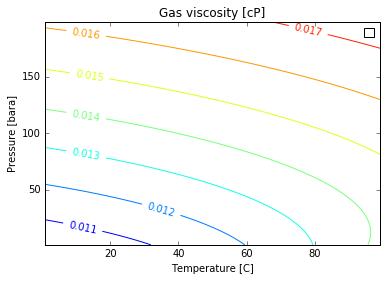

In [44]:
#@title Gas Visocsity Chart
#@markdown How to calculate a viscosity chart for a natural gas
minPressure = 1.0  #@param {type:"number"}
maxPressure = 200.0  #@param {type:"number"}

minTemperature = 1.0  #@param {type:"number"}
maxTemperature = 100.0  #@param {type:"number"}

# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 0.9)
fluid1.addComponent('ethane', 0.1) 

def realgasviscosity(pressure1, temperature1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    TPflash(fluid1)
    fluid1.initProperties();
    return fluid1.getViscosity('cP')

temperature = np.arange(minTemperature, maxTemperature, int((maxTemperature-minTemperature)/100)+1)
pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)

X, Y = np.meshgrid(temperature, pressure)
viscosity = np.fromiter(map(realgasviscosity, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)

fig, ax = plt.subplots()
CS = ax.contour(temperature,pressure, viscosity)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Gas viscosity [cP]')
plt.ylabel('Pressure [bara]')
plt.xlabel('Temperature [C]')
plt.legend(['viscosity [cP]'])

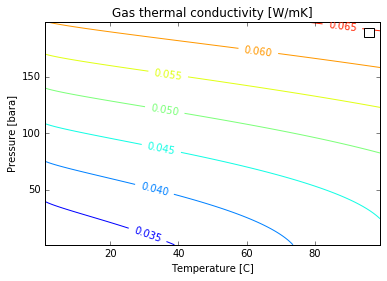

In [46]:
#@title Gas Visocsity Chart
#@markdown How to calculate a viscosity chart for a natural gas
minPressure = 1.0  #@param {type:"number"}
maxPressure = 200.0  #@param {type:"number"}

minTemperature = 1.0  #@param {type:"number"}
maxTemperature = 100.0  #@param {type:"number"}

# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 0.9)
fluid1.addComponent('ethane', 0.1) 

def realgasthermalcond(pressure1, temperature1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    TPflash(fluid1)
    fluid1.initProperties();
    return fluid1.getThermalConductivity('W/mK')

temperature = np.arange(minTemperature, maxTemperature, int((maxTemperature-minTemperature)/100)+1)
pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)

X, Y = np.meshgrid(temperature, pressure)
viscosity = np.fromiter(map(realgasthermalcond, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)

fig, ax = plt.subplots()
CS = ax.contour(temperature,pressure, viscosity)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Gas thermal conductivity [W/mK]')
plt.ylabel('Pressure [bara]')
plt.xlabel('Temperature [C]')
plt.legend(['Gas thermal conductivity [W/mK]'])